<a href="https://colab.research.google.com/github/AravindBiswas/MyStudy/blob/master/Improving_model_activation_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install tensorflow

In [2]:
#verify the installation
import tensorflow as tf
from tensorflow import keras

#Check tf.keras version
print(tf.keras.__version__)

3.8.0


In [3]:
# Loading MNIST dataset
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Data Exploration
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


#Data Processing

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [6]:
# X_train is 60000 rows of 28x28 values; we reshape it to # 60000 x 784.
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)

# Data is converted into float32 to use 32-bit precision # when training a neural network
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the input to be within the range [0,1]
X_train /= 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

60000 train samples
10000 test samples


#Designing the Model

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_0 = Sequential()
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 10)
model_0.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compiling the model.
model_0.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Training the model.
training = model_0.fit(X_train, Y_train, batch_size=64, epochs=70, validation_split=0.2)

Epoch 1/70
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5968 - loss: 1.4892 - val_accuracy: 0.8611 - val_loss: 0.6549
Epoch 2/70
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8518 - loss: 0.6468 - val_accuracy: 0.8789 - val_loss: 0.5065
Epoch 3/70
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8680 - loss: 0.5277 - val_accuracy: 0.8878 - val_loss: 0.4486
Epoch 4/70
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8771 - loss: 0.4755 - val_accuracy: 0.8926 - val_loss: 0.4160
Epoch 5/70
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8827 - loss: 0.4455 - val_accuracy: 0.8967 - val_loss: 0.3952
Epoch 6/70
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8862 - loss: 0.4249 - val_accuracy: 0.8998 - val_loss: 0.3802
Epoch 7/70
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8889 - loss: 0.4068 - val_accuracy: 0.9016 - val_loss: 0.3692
Epoch 8/70
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8958 - loss: 0.3842 - val_accuracy: 0.

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


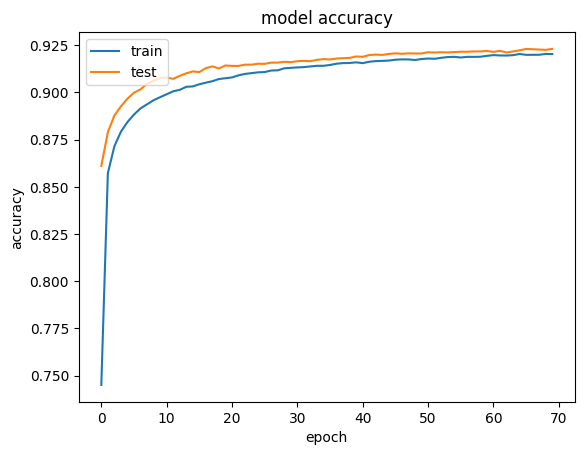

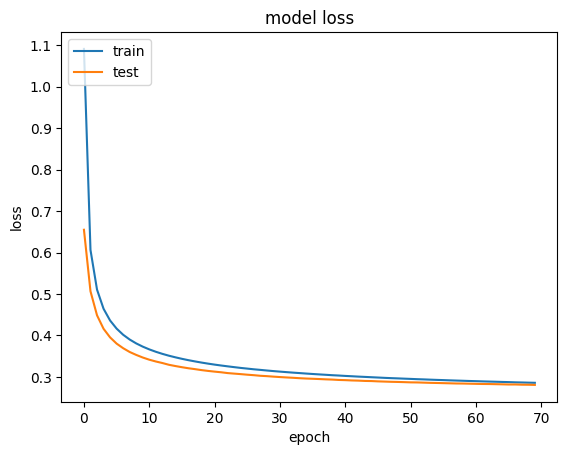

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
#evaluate the model
test_loss, test_acc = model_0.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9101 - loss: 0.3215
Test accuracy: 0.9221000075340271


In [12]:
model_0.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

In [13]:
model_0.get_config()

{'name': 'sequential',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 10,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_

#Improving the train model

In [14]:
#Most common type of model is a stack of layers
model_1 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_1.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)

# Adding another dense layer:
model_1.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_1.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [16]:
# Compiling the model.
model_1.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Training the model.
training = model_1.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2)

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5336 - loss: 1.6210 - val_accuracy: 0.8717 - val_loss: 0.4867
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8714 - loss: 0.4700 - val_accuracy: 0.9003 - val_loss: 0.3518
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8967 - loss: 0.3622 - val_accuracy: 0.9120 - val_loss: 0.3056
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9101 - loss: 0.3177 - val_accuracy: 0.9193 - val_loss: 0.2823
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9176 - loss: 0.2871 - val_accuracy: 0.9253 - val_loss: 0.2621
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9247 - loss: 0.2670 - val_accuracy: 0.9296 - val_loss: 0.2451
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9265 - loss: 0.2604 - val_accuracy: 0.9318 - val_loss: 0.2315
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9334 - loss: 0.2324 - val_accu

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


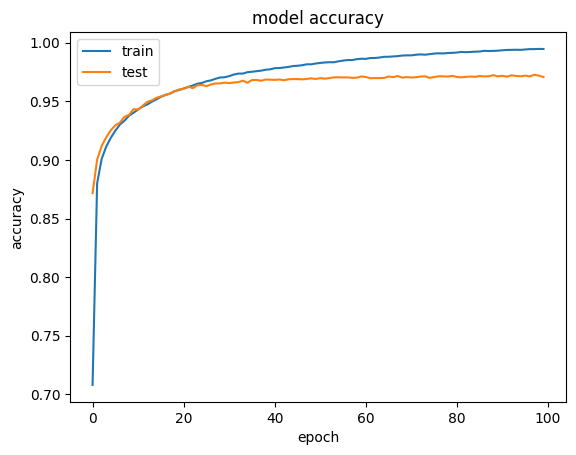

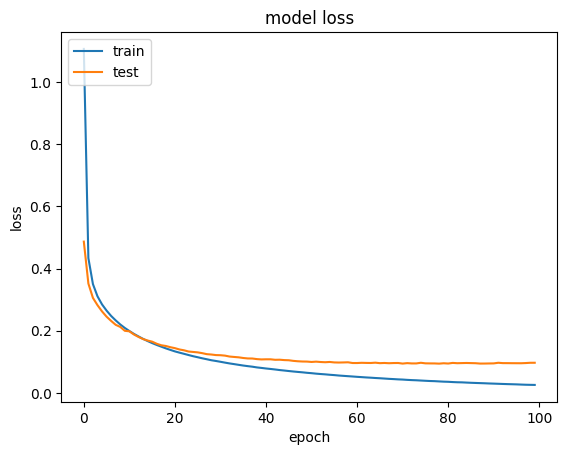

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9690 - loss: 0.1019
Test accuracy: 0.973800003528595


In [20]:
model_1.summary

<bound method Model.summary of <Sequential name=sequential_1, built=True>>

In [21]:
model_1.weights

[<Variable path=sequential_1/dense_layer/kernel, shape=(784, 64), dtype=float32, value=[[ 0.05046771  0.01072162  0.08165436 ...  0.08410712  0.07152893
    0.07388719]
  [ 0.00549769  0.05607217 -0.08332017 ... -0.03367508 -0.00081167
   -0.05941087]
  [ 0.03296544 -0.07389402  0.05905548 ...  0.06621902  0.05206387
   -0.05118845]
  ...
  [ 0.04722946 -0.00418317  0.03470339 ...  0.00415551 -0.04049189
   -0.03495602]
  [ 0.06762756  0.01292125  0.06143863 ... -0.05502354  0.03648207
   -0.01926173]
  [ 0.07494121 -0.00351546 -0.07947998 ... -0.04355618 -0.07774803
    0.01459765]]>,
 <Variable path=sequential_1/dense_layer/bias, shape=(64,), dtype=float32, value=[ 0.0644552  -0.00783808  0.06976809  0.04397971 -0.10944275  0.07164303
   0.168004    0.0349251  -0.17002085  0.03619182  0.09106989 -0.05036093
   0.1362267   0.05862536  0.14599374  0.09843816  0.10029291  0.06808364
   0.19903894  0.01645387  0.06100504 -0.07532986 -0.06126785  0.04362626
   0.00696884 -0.0715457   0.16

In [22]:
model_1.get_config()

{'name': 'sequential_1',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_1'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel

#Drop out to increase the efficiency Overfitting

In [23]:
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_2 = tf.keras.Sequential()
N_hidden = 128
# Adds a densely-connected layer with 64 units to the model:
model_2.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_2.add(Dropout(0.3))
# Adding another dense layer:
model_2.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_2.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_2.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [24]:
# Compiling the model.
model_2.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
# Training the model.
training = model_2.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3922 - loss: 1.7971 - val_accuracy: 0.8648 - val_loss: 0.5554
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7844 - loss: 0.7122 - val_accuracy: 0.8995 - val_loss: 0.3728
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8383 - loss: 0.5356 - val_accuracy: 0.9097 - val_loss: 0.3142
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8623 - loss: 0.4612 - val_accuracy: 0.9171 - val_loss: 0.2809
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8807 - loss: 0.4068 - val_accuracy: 0.9232 - val_loss: 0.2570
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8891 - loss: 0.3809 - val_accuracy: 0.9283 - val_loss: 0.2405
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8932 - loss: 0.3613 - val_accuracy: 0.9333 - val_loss: 0.2271
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9032 - loss: 0.3273 - val_accuracy: 0.

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


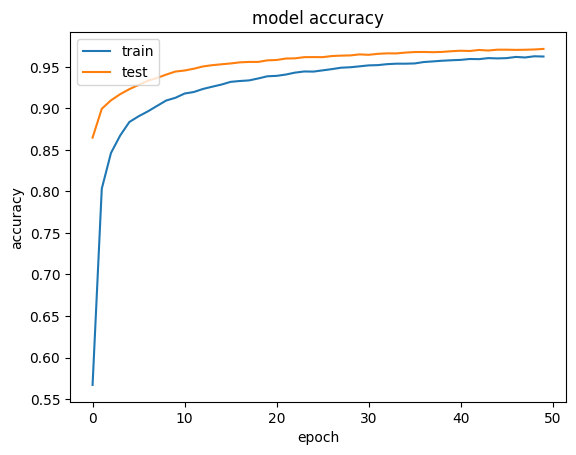

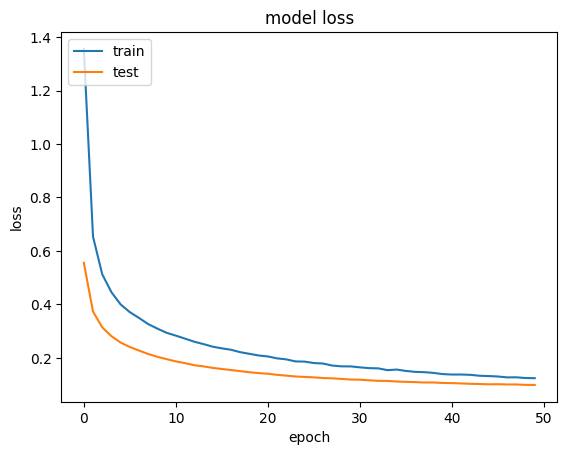

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
#evaluate the model
test_loss, test_acc = model_2.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9655 - loss: 0.1147
Test accuracy: 0.97079998254776


In [28]:
model_2.weights

[<Variable path=sequential_2/dense_layer/kernel, shape=(784, 128), dtype=float32, value=[[-0.01270306  0.06890523 -0.08027545 ...  0.08065794  0.02254654
   -0.02007975]
  [ 0.01026811 -0.0563946   0.03299313 ... -0.06347818  0.04964066
    0.06523722]
  [ 0.02646622  0.05206736  0.04749901 ...  0.00426168  0.00680124
   -0.04465314]
  ...
  [-0.07181858  0.01361126  0.05050033 ... -0.00910381  0.06145296
    0.03603108]
  [-0.02008764 -0.04711135  0.07459184 ...  0.04911021 -0.07126206
   -0.05585029]
  [-0.05328263  0.07213632  0.07976391 ... -0.05472395 -0.00747232
    0.06029693]]>,
 <Variable path=sequential_2/dense_layer/bias, shape=(128,), dtype=float32, value=[ 0.09619805 -0.02381174 -0.04971915  0.13091859  0.04061946 -0.04960978
   0.04189728  0.11336681 -0.01798981  0.14756763 -0.00399282 -0.07898436
   0.01466973 -0.00452058  0.00501764  0.00979375 -0.01782124 -0.10643762
   0.01196072  0.00034474  0.05391089  0.01791749 -0.12015623  0.04574881
   0.09304498  0.04681338  0.